In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('seaborn-dark-palette')

In [3]:
plt.rcParams["figure.figsize"]=8,6
plt.rcParams.update({'font.size': 16})

In [4]:
exoplanets = pd.read_csv('/home/juan/Documents/PAPER_TESS/data/exoplanetas_julio_22.csv')

In [5]:
len(exoplanets)

2166

In [8]:
exoplanets.columns

Index(['pl_name', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year',
       'disc_facility', 'soltype', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_denslim',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt',
       'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'pl_imppar', 'pl_impparerr1',
       'pl_impparerr2', 'pl_impparlim', 'pl_trandep', 'pl_trandeperr1',
       'pl_trandeperr2', 'pl_trandeplim', 'pl_ratror', 'pl_ratrorerr1',
       'pl_ratrorerr2', 'pl_ratrorlim', 'st_spectype',

In [9]:
parecidos = exoplanets[exoplanets.pl_orbper >= 1.0]
parecidos = parecidos[parecidos.pl_orbper <= 10.0]
parecidos = parecidos[parecidos.pl_bmasse >= 60.0]
parecidos = parecidos[parecidos.pl_bmasse <= 100.0]
parecidos = parecidos[parecidos.pl_bmasseerr1/parecidos.pl_bmasse <= 0.20]
parecidos = parecidos[parecidos.pl_bmasseerr2/parecidos.pl_bmasse >= -0.20]
#parecidos = parecidos[parecidos.pl_bmasseerr1 <= 10.0]
#parecidos = parecidos[parecidos.pl_bmasseerr2 >= -10.0]
parecidos.shape

(54, 76)

In [10]:
masas = np.linspace(50,110, 1000)
densidades=np.asarray([0.1,0.5,1.0,1.5,2.0, 1000])
cambio_de_unid = 1/0.01747765891
densidades = densidades*cambio_de_unid
radios1 = (3/(4*np.pi)*masas/densidades[0])**(1/3)
radios2 = (3/(4*np.pi)*masas/densidades[1])**(1/3)
radios3 = (3/(4*np.pi)*masas/densidades[2])**(1/3)
radios4 = (3/(4*np.pi)*masas/densidades[3])**(1/3)
radios5 = (3/(4*np.pi)*masas/densidades[4])**(1/3)
radios6 = (3/(4*np.pi)*masas/densidades[5])**(1/3)


In [11]:
#OTEGI 2020 M-R relation
from uncertainties import ufloat
from uncertainties.umath import *
import astropy.units as u

radios7 = 0.70*masas**(0.63)*u.R_earth.to(u.R_jup)

No handles with labels found to put in legend.


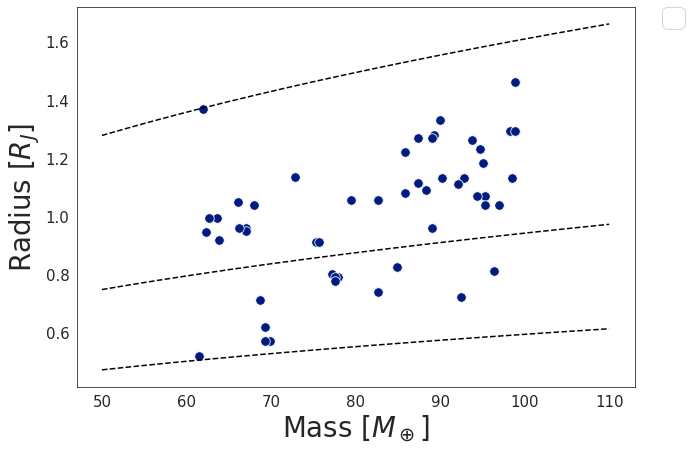

In [12]:
figure = plt.figure(figsize=(10, 7))
sns.set_style("white")
sns.scatterplot(x='pl_bmasse', y='pl_radj', data=parecidos, s=90, palette="ch:s=.25,rot=-.25")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='xx-large')
plt.xlabel('Mass [$M_\oplus$]', fontsize='xx-large')
plt.ylabel('Radius [$R_J$]', fontsize='xx-large')

plt.plot(masas,radios1, color='black', label='Density = 0.1', linestyle="--")
plt.plot(masas,radios2, color='black', label='Density = 0.5', linestyle="--")
#plt.plot(masas,radios3, color='red', label='Density = 100')
#plt.plot(masas,radios4, color='black', label='Density = 1.5')
plt.plot(masas,radios5, color='black', label='Density = 2.0', linestyle="--")
#plt.plot(masas,radios6, color='red', label='Density = 5')
# plt.xlim(60,100)
#plt.ylim(0.1,1.5)
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=15)

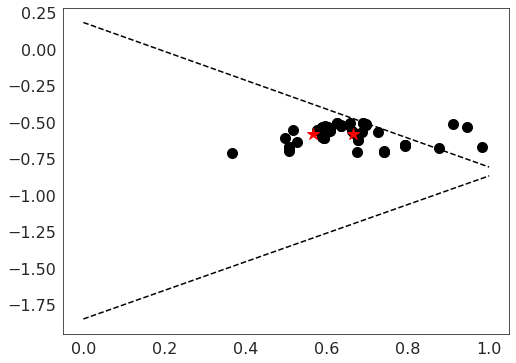

In [13]:
#neptunian desert in Period mass diagram
def des1(x):
    return 0.98*x-1.85
def des2(x):
    return -0.99*x+0.18
x=np.linspace(1,10,100)
plt.plot(np.log10(parecidos['pl_orbper']), np.log10(parecidos['pl_bmassj']), 'o', color='black', markersize=10)
plt.plot(np.log10(x),des1(np.log10(x)), color='black', linestyle='--')
plt.plot(np.log10(x),des2(np.log10(x)), color='black', linestyle='--')
plt.plot([np.log10(3.67)], [np.log10(0.26)], marker='*', ms=13, color='red', label='1273')
plt.plot([np.log10(4.63)], [np.log10(0.26)], marker='*', ms=13, color='red', label='1273')
#plt.xlim(0,10.0)
#plt.ylim(-2,2)
plt.show()

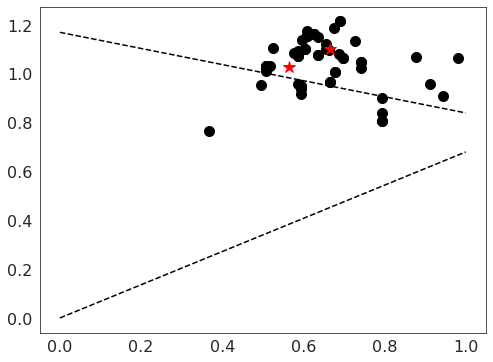

In [14]:
#neptunian desert in Period radius diagram
def des3(x):
    return -0.33*x+1.17
def des4(x):
    return 0.68*x
x=np.linspace(1,10,100)
plt.plot(np.log10(parecidos['pl_orbper']), np.log10(parecidos['pl_rade']), 'o', color='black', markersize=10)
plt.plot(np.log10(x),des3(np.log10(x)), color='black', linestyle='--')
plt.plot(np.log10(x),des4(np.log10(x)), color='black', linestyle='--')
plt.plot([np.log10(3.67)], [np.log10(0.95*11.2089)], marker='*', ms=13, color='red', label='1273')
plt.plot([np.log10(4.63)], [np.log10(1.13*11.2089)], marker='*', ms=13, color='red', label='1273')
plt.show()

In [15]:
# find the length of the list
print(len(parecidos))
# create a set from the list
myset = set(parecidos.pl_radj)
# find the length of the Python set variable myset
print(len(myset))
# compare the length and print if the list contains duplicates
if len(parecidos) != len(myset):
    print("duplicates found in the list")
else:
    print("No duplicates found in the list")

54
39
duplicates found in the list


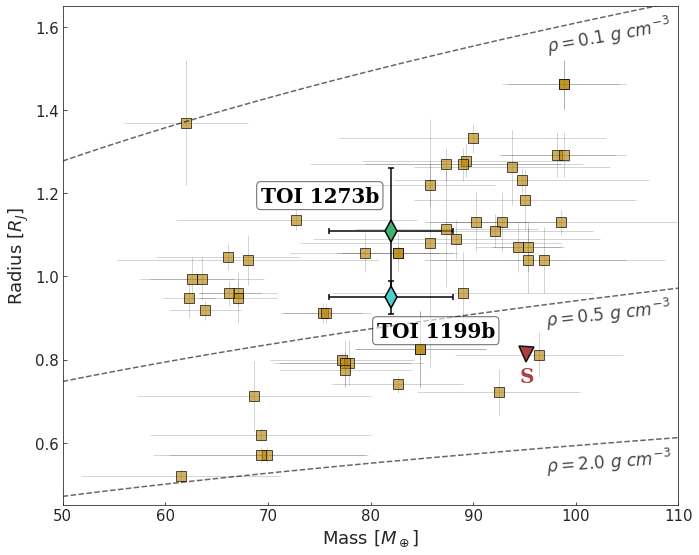

In [21]:
from curses.panel import bottom_panel

plt.figure(figsize=(10, 8))
plt.plot(parecidos['pl_bmasse'], parecidos['pl_radj'], 's', color='C4', ms=10, 
        markeredgecolor='k', markeredgewidth=1, alpha=0.65)
plt.errorbar(parecidos['pl_bmasse'], parecidos['pl_radj'], yerr=parecidos['pl_radjerr1'], 
            xerr=parecidos['pl_bmasseerr1'], fmt='none', color='k', alpha=0.28, elinewidth=0.6)
plt.xlabel('Mass [$M_\oplus$]', fontsize=18)
plt.ylabel('Radius [$R_J$]', fontsize=18)
plt.plot(masas,radios1, color='black', linestyle="--", alpha=0.6)
plt.plot(masas,radios2, color='black', linestyle="--", alpha=0.6)
plt.plot(masas,radios5, color='black', linestyle="--", alpha=0.6)
#plt.plot(masas,radios7, color='red', linestyle="--", alpha=0.6)
plt.errorbar([82], [0.95], marker='d', ls='none', ms=15, color='mediumturquoise', xerr=[6], yerr=[0.04], 
            markeredgecolor='k', markeredgewidth=1.5, ecolor='k', elinewidth=1.5, capsize=3)
#plt.plot([82.4], [0.95], marker='*', ls='none', ms=15, color='red', markeredgecolor='k', markeredgewidth=2, label = 'TOI 1199b')
plt.errorbar([82], [1.11], marker='d', ls='none', ms=15, color='mediumseagreen', xerr=[6], yerr=[0.15], 
            markeredgecolor='k', markeredgewidth=1.5, ecolor='k', elinewidth=1.5, capsize=3)
plt.plot([95.16], [0.8145], marker='v', ls='none', ms=15, color='brown', markeredgecolor='k', markeredgewidth=1.5, alpha=0.9)
#plt.plot([81.8], [1.13], marker='*', ls='none', ms=15, color='brown', markeredgecolor='k', markeredgewidth=2, label = 'TOI 1273b')
plt.tick_params(axis='both', labelsize=15)
plt.text(97, 1.54, r'$\rho = 0.1 ~g~ cm^{-3}$', fontsize=17, rotation=10, alpha=0.85)
plt.text(97, 0.88, r'$\rho = 0.5 ~g~ cm^{-3}$', fontsize=17, rotation=6, alpha=0.85)
plt.text(97, 0.53, r'$\rho = 2.0 ~g~ cm^{-3}$', fontsize=17, rotation=4, alpha=0.85)
plt.text(80.6, 0.855, 'TOI 1199b', fontsize=20, alpha=1, weight='black', fontfamily='serif', style='normal',  color='k',
        bbox={'boxstyle':'round', 'pad':0.2, 'color':'C5','fc':'white', 'ec':'k', 'alpha':0.6})
plt.text(69.30, 1.18, 'TOI 1273b', fontsize=20, alpha=1,  weight='black', fontfamily='serif', style='normal',  color='k',
        bbox={'boxstyle':'round', 'pad':0.2, 'color':'C1','fc':'white', 'ec':'k', 'alpha':0.6})
plt.text(94.53, 0.745, 'S', fontsize=20, alpha=0.9,  weight='bold', fontfamily='serif', style='normal',  color='brown')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.xlim(50,110)
plt.ylim(0.45,1.65)
plt.tight_layout()
#plt.savefig('density_plot.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

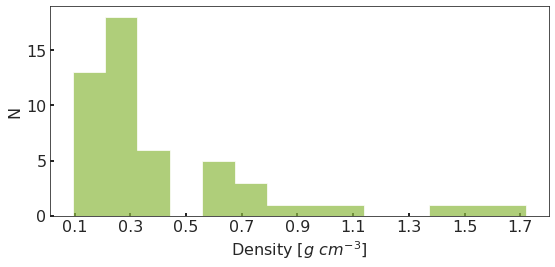

In [32]:
plt.figure(figsize=(8, 4))
plt.hist(parecidos.pl_dens, bins=14, histtype='stepfilled', color='#8EBA42', alpha=0.7)
plt.xlabel('Density [$g~cm^{-3}$]')
plt.tick_params(axis='both', bottom=True, left=True, direction='in', width=2)
plt.xticks(np.arange(0.1, 1.8, 0.2))
#plt.yticks([])
plt.ylim(0,19)
plt.ylabel('N')
plt.tight_layout()
#plt.savefig('density_hist.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()